In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [84]:
imp.reload(hmmlearn.hmm)

<module 'hmmlearn.hmm' from '/opt/anaconda3/lib/python3.8/site-packages/hmmlearn/hmm.py'>

In [8]:
imp.reload(CalHMM)

<module 'CalHMM' from '/Users/daiyiluo/Documents/ELEC599/CalHMM.py'>

## a. Load data

In [36]:
folder = '/Users/daiyiluo/Downloads/caiman_t/dan_CA1' #'/Users/daiyiluo/Downloads/KQ095_210205' #KQ086_210110' #
timebin = 200

In [37]:
data = np.load(f'{folder}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = [] #data['lap_end'] #
idx = data['idx']
del data

Spike = np.load(f'{folder}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape #, idx.shape # Spike should be of shape (#sample, #neuron)

((1844, 545), (1844,))

In [ ]:
%matplotlib

In [ ]:
_, ax1 = plt.subplots()
ax1.plot(Trace[:,5], 'r', label='Trace')
ax2 = ax1.twinx()
ax2.plot(Spike[:,5]/50, label='Spike')
plt.legend()

In [28]:
non_dr = []
dr = []
dr_ts = []

In [34]:
non_dr, dr, dr_ts

([0.40144278176971765,
  0.35843805504780646,
  0.3928362451767707,
  0.41224162224061206,
  0.4087041993417648,
  0.39514586017795184,
  0.4191465318868138,
  0.37078859980785517,
  0.42195601586046155,
  0.42115756360273404,
  0.3929308258075562,
  0.37636864707075524,
  0.41206287707985817,
  0.3689533570750095,
  0.38216915598356305,
  0.3841465609342865,
  0.40475389843143983,
  0.37710038042863103,
  0.4262072445588161,
  0.40484195935803796],
 [0.2007538307728092,
  0.22223993693564842,
  0.24211733090461196,
  0.22976811462590638,
  0.22024135619694424,
  0.2368158596763557,
  0.26473947098553663,
  0.2096826135641297,
  0.22251875764903267,
  0.2569978051490776,
  0.2597791654591326,
  0.21668209068666178,
  0.2144465291033098,
  0.24241180431370446,
  0.2097967538911157,
  0.20720068091874988,
  0.2217881295587947,
  0.20862615016770814,
  0.23033837332370194,
  0.24615831617213818],
 [0.20588164882949941,
  0.21608244136997154,
  0.2448682720867618,
  0.2400798082612174,
  0

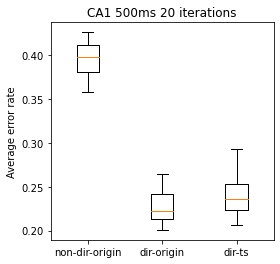

In [35]:
plt.figure(figsize=(4,4))
plt.boxplot([non_dr, dr, dr_ts], labels=['non-dir-origin', 'dir-origin', 'dir-ts'])
plt.ylabel('Average error rate')
plt.title('CA1 500ms 20 iterations')
plt.show()

## b. Run Poisson HMM

In [33]:
for i in range(10):
    origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
    origin.fit(Spike)

    x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='maximum')
    err_rate, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'linear')

    err_rate1, idx_fwd, idx_bwd, Decoded_position, Distance_both, x_bwd, x_fwd = CalHMM.comp_decoded_dir(origin, Spike, Distance, plot=False)

    ts_Spike = CalHMM.get_time_shuffle(Spike)
    ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
    ts.fit(ts_Spike)

    err_rate2, idx_fwd2, idx_bwd2, Decoded_position2, Distance_both2, x_bwd2, x_fwd2 = CalHMM.comp_decoded_dir(ts, Spike, Distance, plot=False)

    non_dr.append(err_rate)
    dr.append(err_rate1)
    dr_ts.append(err_rate2)

213.13061305930992
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([12, 96, 67, 29,  9, 36, 70, 49,  9, 48, 39, 10, 31, 41, 38, 33, 22,
       15, 39, 45]))
20
err_rate:0.2597791654591326
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([ 22,  30,  42,  32,  92,  79,   5,  68,   9,  26,  14,  46, 134,
         2,  30,  14,  28,   5,  45,  15]))
20
err_rate:0.23272787059470867
213.13061305930992
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([ 23,  34,  34,  23,  36,  77,   6,  27,  32,  14,  43,  43,   7,
        69,  33,  66, 122,  19,   6,  24]))
20
err_rate:0.21668209068666178
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([ 35, 160, 123,   5,   2,  35,  69,  58,  13,  18,  17,  15,   3,
         3,   5,  28,  30,  41,  15,  63]))
20
err_rate:0.22783137784020294
213

### Original data

In [38]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='maximum')
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'linear')

print(f'Error Rate: {err_rate1}')

213.13576834960736
Error Rate: 0.3534376967545822


In [6]:
np.sum(origin.means_,axis=1)

array([288.23191592, 380.60670105, 284.9636503 , 274.91958832,
       389.00965728, 301.90310007, 226.40647483, 367.48810404,
       530.38251601, 328.4396566 , 359.96501668, 398.95062628,
       330.18617266, 375.60285494, 292.17441779, 313.5040684 ,
       353.07844684, 427.35707756, 301.54423471, 209.31291503])

#### Directional Place Field

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([129, 162,  74,  19, 146,  28,  60, 116,  60, 121,  74, 101,  59,
       188,  78,  77, 122,  61, 100,  69]))
20
err_rate:0.239943987786898


NameError: name 'CalHMM' is not defined

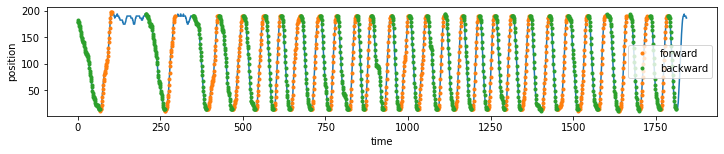

<Figure size 432x288 with 0 Axes>

In [40]:
err_rate, idx_fwd, idx_bwd, Decoded_position, Distance_both, x_bwd, x_fwd = CalHMM.comp_decoded_dir(origin, Spike, Distance, plot=True)

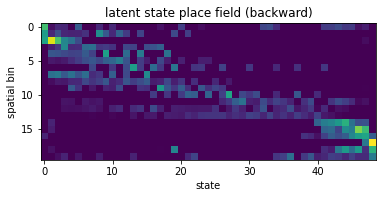

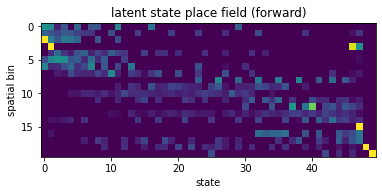

In [9]:
plt.imshow(x_bwd, vmax=.3)
plt.xlabel('state')
plt.ylabel('spatial bin')
plt.title('latent state place field (backward)')
plt.show()

plt.imshow(x_fwd, vmax=.3)
plt.xlabel('state')
plt.ylabel('spatial bin')
plt.title('latent state place field (forward)')
plt.show()

------------ End Directional Place Field --------------

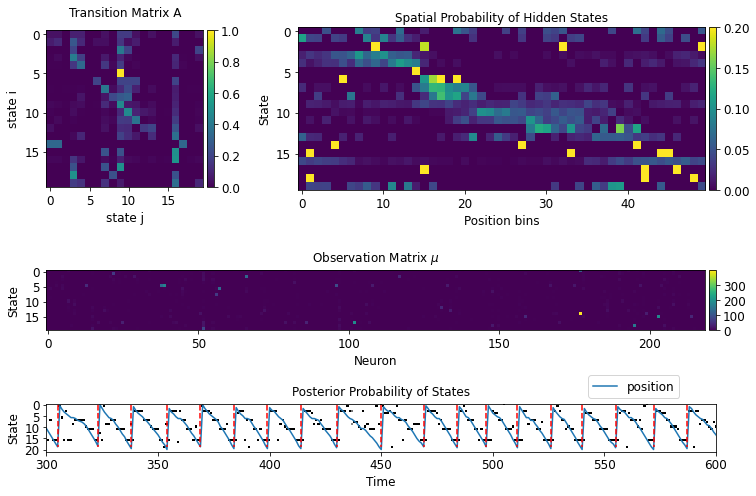

In [8]:
_, plst1, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=300, t_duration=300,vmax=.2)


In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

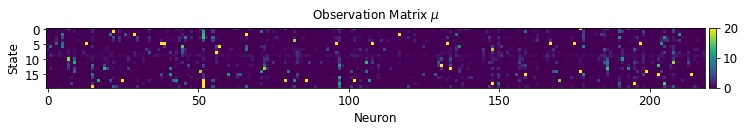

In [19]:
f, ax = plt.subplots(figsize=(12,3))
im = ax.matshow(origin.means_[plst1,:],vmax=20)
ax.set_xlabel('Neuron')
ax.set_ylabel('State')
ax.set_title(r'Observation Matrix $\mu$')
ax.xaxis.set_ticks_position('bottom')
divider = make_axes_locatable(ax)
f.colorbar(im, cax=divider.append_axes("right", size=0.1,pad=0.05))

### Time Shuffle

In [21]:
%matplotlib

Using matplotlib backend: MacOSX


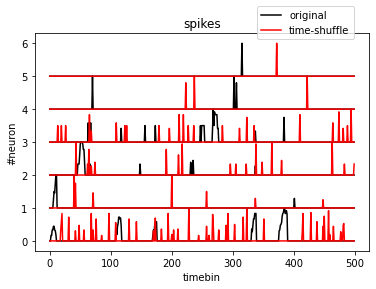

In [45]:
plt.figure()
c = Spike[750:1250,:6]
ts_Spike = CalHMM.get_time_shuffle(c)
for i in range(5):
    t=c[:,i]
    t1=ts_Spike[:,i]
    plt.plot(t/np.max(t)+i,'k')
    plt.plot(t1/np.max(t1)+i,'r')

i=5
t=c[:,i]
t1=ts_Spike[:,i]
plt.plot(t/np.max(t)+i,'k', label='original')
plt.plot(t1/np.max(t1)+i,'r', label='time-shuffle')

plt.xlabel('timebin')
plt.ylabel('#neuron')
plt.title('spikes')
plt.legend(bbox_to_anchor=(0.65, 0.95))

In [22]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

# x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
# err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

# print(f'Error Rate: {err_rate2}')

PoissonHMM(n_components=20)

In [24]:
err_rate2, idx_fwd2, idx_bwd2, Decoded_position2, Distance_both2, x_bwd2, x_fwd2 = comp_decoded_dir(ts, Spike, Distance, plot=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([ 73,  57,  70, 240, 126, 146,  34, 111,  63,  28,  81,  39, 141,
        84,  61, 158,  54, 125,  74,  79]))
err_rate:0.3140491893759059


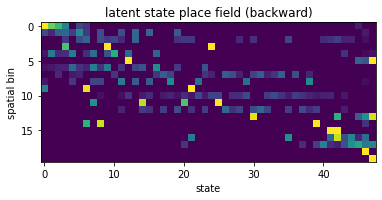

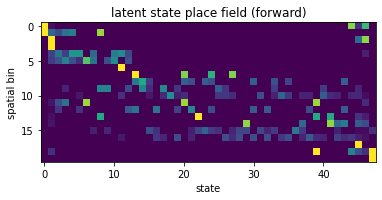

In [13]:
plt.imshow(x_bwd2, vmax=.3)
plt.xlabel('state')
plt.ylabel('spatial bin')
plt.title('latent state place field (backward)')
plt.show()

plt.imshow(x_fwd2, vmax=.3)
plt.xlabel('state')
plt.ylabel('spatial bin')
plt.title('latent state place field (forward)')
plt.show()

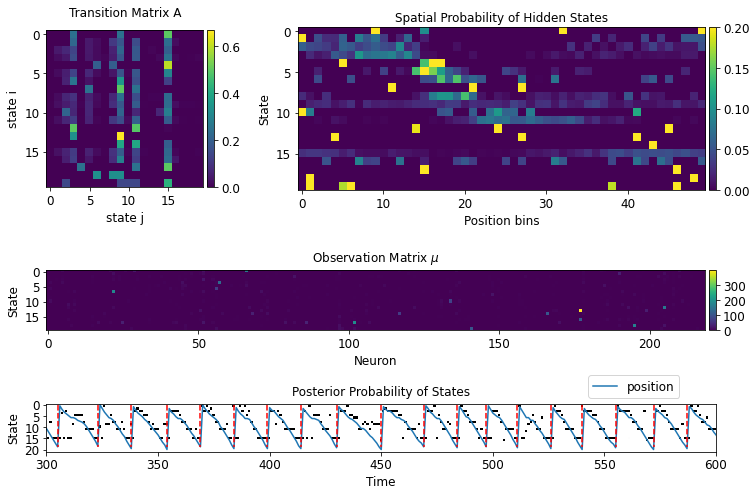

In [7]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=300, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')

## Check coactivation in states

In [ ]:
origin.means_.shape

[  0 161 214 218 223 225 277 298 327 381]


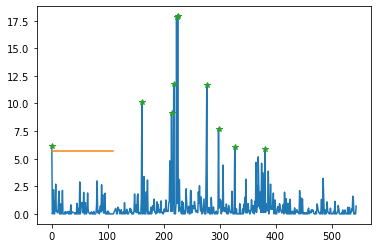

In [29]:
n=plst1[8]
means=origin.means_[n,:]
thr=means.mean()+3*means.std()
nn=np.where(origin.means_[n,:]>thr)[0]
plt.plot(means)
plt.plot([0,110],[thr,thr])
plt.plot(nn, means[nn],'*')
print(nn)

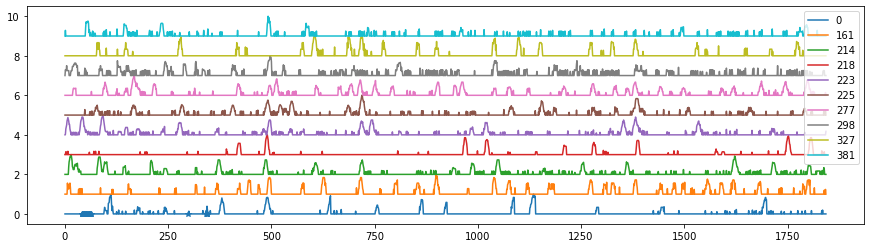

In [31]:
plt.figure(figsize=(15,4))
s=np.where(np.argmax(posterior_states1, axis = 1)==i)[0]

for j,i in enumerate(nn):
    t=Spike[:,i].copy()
    t=t/np.max(t)
    plt.plot(t+j, label=f'{i}')

plt.plot(s,np.zeros_like(s),'*')
plt.legend()

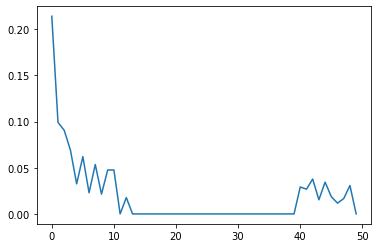

In [32]:
plt.figure()
plt.plot(x1[1,:])

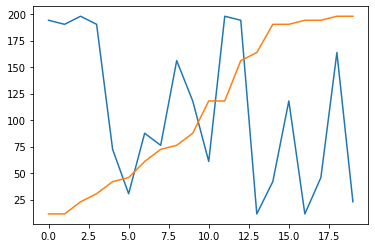

In [33]:
plt.plot(pos_COM1)
plt.plot(pos_COM1[plst1])

In [ ]:
%matplotlib

In [36]:
pos_COM = np.max(x1,axis=1)
d = np.unique(Distance)
pos_COM.shape

(20,)

In [43]:
plt.matshow(x1)
for i,pos in enumerate(pos_COM):
    plt.plot(np.where(d==pos)[0],i,'*') # just for circle, linear's pos_COM is not one of d

#### Check latent state occurrence preference 

In [12]:
state = np.zeros_like(posterior_states1)
for i in range(posterior_states1.shape[0]):
    state[i,np.argmax(posterior_states1[i,:])]=1

In [13]:
state.shape

(1844, 20)

Text(0.5, 0, 'time')

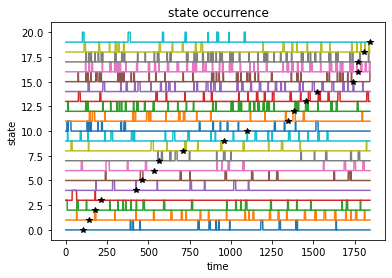

In [14]:
for i,j in enumerate(plst1):
    plt.plot(state[:,j]+i)
    plt.plot(pos_COM1[j]/pos_COM1.max()*len(Distance),i,'k*')
plt.title('state occurrence')
plt.ylabel('state')
plt.xlabel('time')

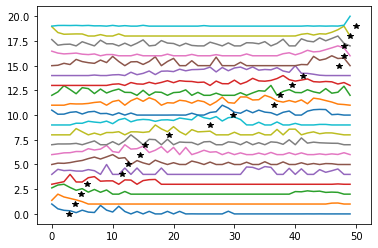

In [15]:
for i in range(20):
    plt.plot(x1[i,:]/np.max(x1[i,:])+i)
    plt.plot(pos_COM1[plst1[i]]/np.max(Distance)*50,i,'k*')

In [27]:
pos_COM1

array([0.26730955, 1.59635151, 1.534493  , 0.73000197, 0.22983062,
       0.48206299, 0.99166734, 0.78389967, 1.21764314, 0.20809613,
       0.54340876, 0.76949949, 1.60104294, 0.4896328 , 1.75636439,
       1.77580357, 0.79741392, 1.67952381, 0.09088231, 0.69993747])

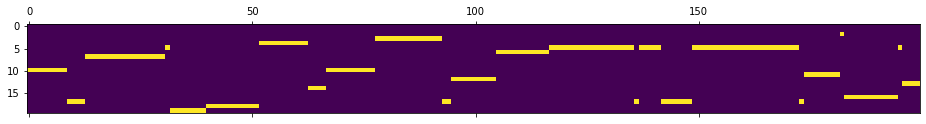

In [12]:
plt.matshow(state[:200,:].T)